In [94]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## For our MVP Lets build a multiple linear regression model with the US gross box office value as the target using only one of the numerical features. These features are Year, IMDB Score, Metascore, Number of Votes, and Run time

In [28]:
#Reading in the data and selecting only numerical values
movies_mvp = pd.read_csv('/Users/Anu/Desktop/Metis/Online Flex/Regression/funny_movie3.csv')

# keep only numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
movies_2 = movies_mvp.select_dtypes(include=numerics)

type(movies_2)
movies_2 = movies_2.drop(columns = ['Unnamed: 0'])
movies_2.describe()

,year,imdb,metascore,votes,box_office,run_times
count,1344.000000,1344.000000,1344.000000,1.344000e+03,1344.000000,1344.000000
mean,2001.596726,6.333631,53.276042,1.227470e+05,78.816652,102.986607
std,12.314791,0.890037,16.632970,1.433152e+05,65.423605,13.614569
min,1940.000000,2.400000,1.000000,1.764000e+03,24.810000,63.000000
25%,1994.000000,5.800000,41.000000,3.468025e+04,37.050000,93.000000
50%,2004.000000,6.400000,53.000000,7.456600e+04,57.025000,102.000000
75%,2011.000000,6.900000,65.000000,1.517552e+05,97.472500,111.000000
max,2020.000000,8.600000,99.000000,1.115869e+06,608.580000,210.000000


## Now lets use a pairplot & heatmap to select our predictive numerical feature

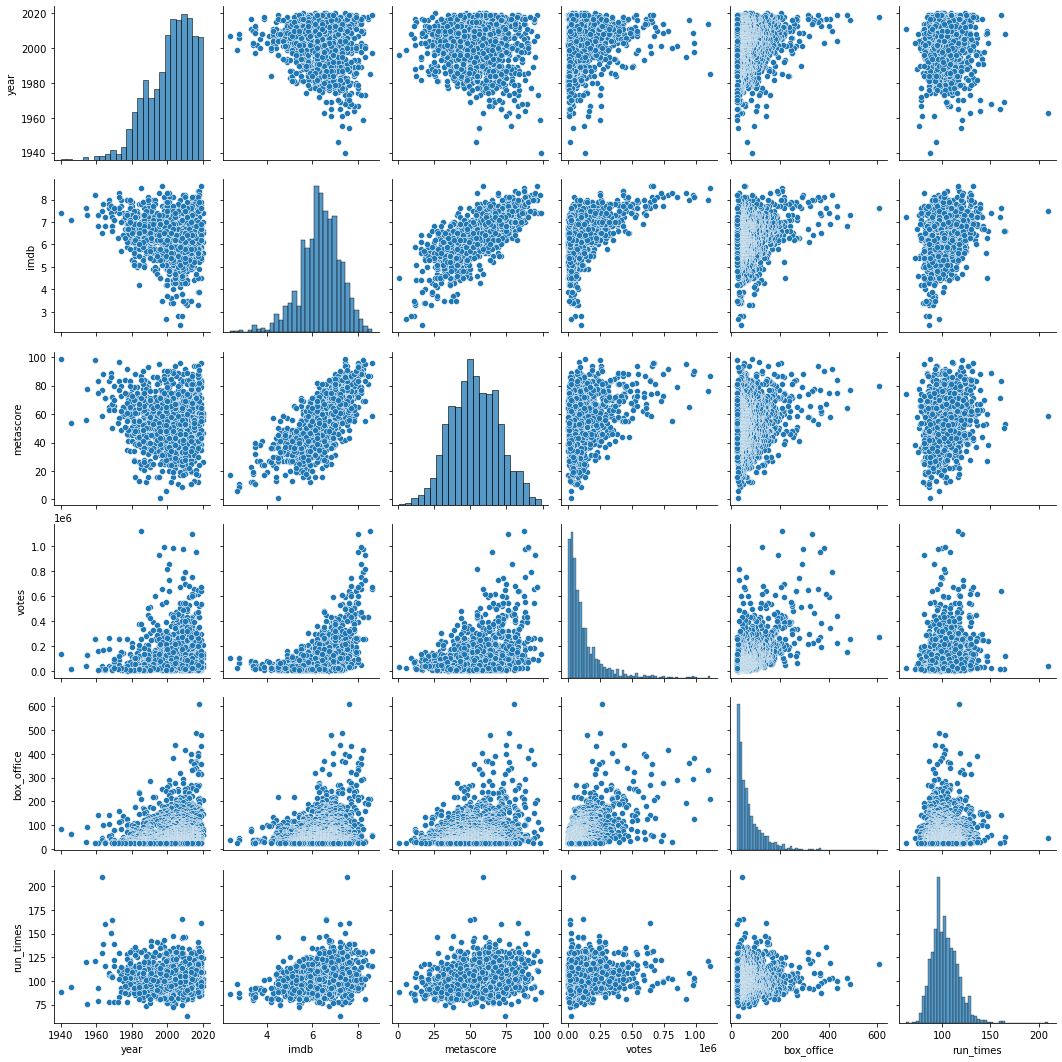

In [29]:
sns.pairplot(movies_2)

## Well this isn't great, lets use a heatmap and see if its any clearer

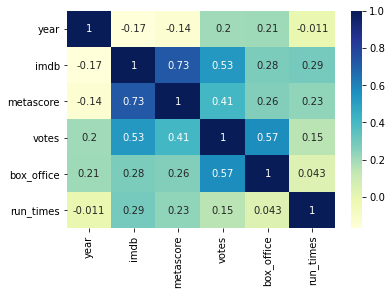

In [30]:
sns.heatmap(movies_2.corr(), cmap="YlGnBu", annot = True)
plt.show()

## According to the heatmap votes are the most correlated with box office, this isn't too surprising. Lets build a simple lin reg model with votes as the predictive feature.

In [31]:
#lets get rid of the index column, and create a new df with the other features dropped
movies_3 = movies_2.drop(columns = ['year', 'imdb', 'run_times', 'metascore'])
movies_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   votes       1344 non-null   int64  
 1   box_office  1344 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 21.1 KB


In [32]:
#Now lets split our data set and build a lin reg model using the votes feature
x_mvp = movies_3['votes']
y_mvp = movies_3['box_office']
X_train, X_test, y_train, y_test = train_test_split(
x_mvp, y_mvp, test_size=0.33, random_state=42)

In [24]:
type(X_train)

pandas.core.frame.DataFrame

In [33]:
X_train_sm = sm.add_constant(X_train)


In [34]:
model_mvp_2 = sm.OLS(y_train, X_train_sm)
movie_model_mvp_2 = model_mvp_2.fit()
movie_model_mvp_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box_office   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     446.2
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.02e-80
Time:                        09:27:51   Log-Likelihood:                -4937.2
No. Observations:                 900   AIC:                             9878.
Df Residuals:                     898   BIC:                             9888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.7453      2.540     18.407      0.000      41.761      51.729
votes          0.0003   1.28e-05     21.123      0.000       0.000       0.000
==============================================================================
Omnibus:                      490.133   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6728.406
Skew:                           2.168   Prob(JB):                         0.00
Kurtosis:                      15.673   Cond. No.                     2.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The coefficient for Votes is 0.003, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.

## R-squared value is 0.332, which means that 33.2% of the box_office variance can be explained by the votes column using this line.

## Prob F-statistic has a very low p-value, so the model fit is statistically significant. 


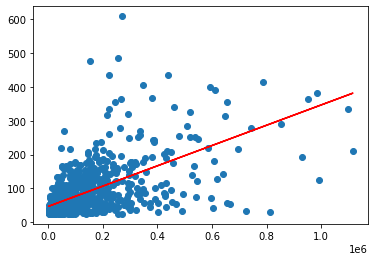

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 46.7453 + 0.0003*X_train, 'r')
plt.show()


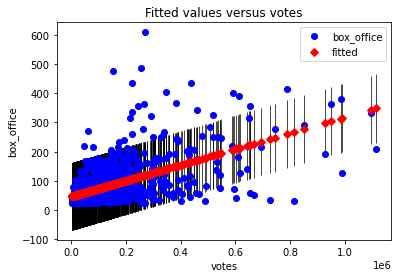

In [182]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(movie_model_mvp_2, 1, ax=ax)

## Ultimately we expect the number of votes to be correlated with US Gross Box office values, but what does this really tell us? Not much, so lets incorporate our non-numerical features and build a better model.


<AxesSubplot:ylabel='cooks_d'>

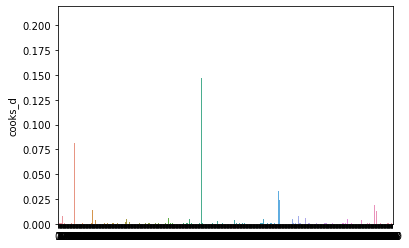

In [184]:
#Lets also check for outliers!
influential_points_count = 0


influence = movie_model_mvp_2.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.barplot(y = 'cooks_d',
            x = influence_frame.index,
            data = influence_frame)

In [187]:
max_index = influence_frame['cooks_d'].idxmax()
movies_mvp.iloc[max_index]

Unnamed: 0                           89
movie                           Ant-Man
year                               2015
imdb                                7.3
metascore                            64
votes                            609200
box_office                        180.2
P_rating                          PG-13
run_times                           117
genres        Action, Adventure, Comedy
director                    Peyton Reed
director_1                  Peyton Reed
Name: 89, dtype: object

In [44]:
#Lets go back to our larger dataset and identitfy which variables we need to create dummies for
movies_mvp.sort_values(by['genres']

,Unnamed: 0,movie,year,imdb,metascore,votes,box_office,P_rating,run_times,genres,director
0,0,Incredibles 2,2018,7.6,80,269837,608.58,PG,118,"Animation, Action, Adventure",Brad Bird
1,1,Finding Dory,2016,7.3,77,255283,486.30,PG,97,"Animation, Adventure, Comedy","Andrew Stanton, Angus MacLane"
2,2,Frozen II,2019,6.8,64,152863,477.37,PG,103,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee"
3,3,Shrek 2,2004,7.2,75,437300,436.47,PG,93,"Animation, Adventure, Comedy","Andrew Adamson, Kelly Asbury, Conrad Vernon"
4,4,Toy Story 4,2019,7.7,84,223676,434.04,G,100,"Animation, Adventure, Comedy",Josh Cooley
5,5,Toy Story 3,2010,8.2,92,787783,415.00,G,103,"Animation, Adventure, Comedy",Lee Unkrich
6,6,Jumanji: Welcome to the Jungle,2017,6.9,58,345836,404.52,PG-13,119,"Action, Adventure, Comedy",Jake Kasdan
7,7,Frozen,2013,7.4,75,593076,400.74,PG,102,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee"
8,8,Guardians of the Galaxy Vol. 2,2017,7.6,67,612785,389.81,PG-13,136,"Action, Adventure, Comedy",James Gunn
9,9,Finding Nemo,2003,8.1,90,985835,380.84,G,100,"Animation, Adventure, Comedy","Andrew Stanton, Lee Unkrich"


In [110]:
#Genre, P_rating, & director all need dummy variables, lets create some categories first
genre_count = movies_mvp['genres'].value_counts()
dir_count = movies_mvp['director'].value_counts()
p_count =movies_mvp['P_rating'].value_counts()
#genre_count.head(50)
#dir_count
p_count


PG-13         486
PG            440
R             327
G              81
odd rating     10
Name: P_rating, dtype: int64

### Some directors may not be counted appropriately if they're grouped with others, the first director listed is the primary director, lets create a new column with just the primary director and see if we get better categories


In [210]:
movies_mvp['director_1'] = movies_mvp.director.str.replace("(,).*","")
movies_mvp.head(40)
#compare value counts of director columns
dir_count = movies_mvp['director'].value_counts()
dir1_count = movies_mvp['director_1'].value_counts()
dir_count
dir1_count.head(20)
#we still have quite a lot of categetories lets hold off on directors for now

Tyler Perry         14
Ivan Reitman        13
Garry Marshall      12
Dennis Dugan        12
Bobby Farrelly      10
Shawn Levy          10
Peter Segal          9
Mike Nichols         9
Chris Columbus       8
Raja Gosnell         8
Todd Phillips        8
Malcolm D. Lee       8
Adam Shankman        8
Robert Zemeckis      8
Barry Sonnenfeld     8
Frank Oz             8
Adam McKay           7
Ron Howard           7
John Landis          7
Harold Ramis         7
Name: director_1, dtype: int64

In [109]:
#Check that our genres don't have redundancies like Action Comedy vs Comedy Action
sorted_genre = genre_count.sort_index()
sorted_genre.head(50)


other                           548
Animation, Adventure, Comedy    167
Comedy, Drama, Romance          140
Comedy                          124
Comedy, Romance                 120
Action, Adventure, Comedy        89
Comedy, Drama                    85
Action, Comedy, Crime            71
Name: genres, dtype: int64

In [80]:
#Categories, using the 5% rules categories with less that 5% of total observations 
#will be placed in an other category

genre_count = movies_mvp['genres'].value_counts()
other_genre = list(genre_count[genre_count <56].index)
movies_mvp['genres'] = movies_mvp['genres'].replace(other_genre, 'other')

p_count = movies_mvp['P_rating'].value_counts()
other_p = list(p_count[p_count < 10].index)
movies_mvp['P_rating'] = movies_mvp['P_rating'].replace(other_p, 'odd rating')

movies_mvp.head()
#p_count
#genre_count

,Unnamed: 0,movie,year,imdb,metascore,votes,box_office,P_rating,run_times,genres,director,director_1
0,0,Incredibles 2,2018,7.6,80,269837,608.58,PG,118,other,Brad Bird,Brad Bird
1,1,Finding Dory,2016,7.3,77,255283,486.30,PG,97,"Animation, Adventure, Comedy","Andrew Stanton, Angus MacLane",Andrew Stanton
2,2,Frozen II,2019,6.8,64,152863,477.37,PG,103,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee",Chris Buck
3,3,Shrek 2,2004,7.2,75,437300,436.47,PG,93,"Animation, Adventure, Comedy","Andrew Adamson, Kelly Asbury, Conrad Vernon",Andrew Adamson
4,4,Toy Story 4,2019,7.7,84,223676,434.04,G,100,"Animation, Adventure, Comedy",Josh Cooley,Josh Cooley


In [97]:
#Now lets make some dummy variables on a smaller df that contains the features of interest
small_movie = movies_mvp.set_index('movie')
small_movie = movies_mvp.loc[:, ['votes', 'box_office', 'P_rating', 
                                 'genres']]
small_movie.head(20)
feature_df = pd.get_dummies(small_movie, drop_first=True)
#feature_df.head()
#feature2_df = pd.get_dummies(small_movie['genres'], drop_first=True)
#feature2_df.head()
#small_movie.head(20)
#small_movie['Ratings'] = pd.get_dummies(small_movie['P_rating'], drop_first=True)
feature_df.head()

,votes,box_office,P_rating_PG,P_rating_PG-13,P_rating_R,P_rating_odd rating,"genres_Action, Comedy, Crime","genres_Animation, Adventure, Comedy",genres_Comedy,"genres_Comedy, Drama","genres_Comedy, Drama, Romance","genres_Comedy, Romance",genres_other
0,269837,608.58,1,0,0,0,0,0,0,0,0,0,1
1,255283,486.30,1,0,0,0,0,1,0,0,0,0,0
2,152863,477.37,1,0,0,0,0,1,0,0,0,0,0
3,437300,436.47,1,0,0,0,0,1,0,0,0,0,0
4,223676,434.04,0,0,0,0,0,1,0,0,0,0,0


## Ok lets partition the data, then build and test a new model on standardized the numerical features. Due to the small size of our data set we will use the kfolds method.


In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
X, y = feature_df.drop('box_office',axis=1), feature_df['box_office']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=5) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)


In [212]:
#Finding alpha 
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2,random_state=42)
std = StandardScaler()
std.fit(X_train_r.values)

## apply the scaler to the train set
X_tr = std.transform(X_train_r.values)
## Apply the scaler to the test set
X_te = std.transform(X_test_r.values)
alphas = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X_tr, y_train_r)
ridge_model.score(X_tr, y_train_r)
r_squared_test = ridge_model.score(X_te, y_test)
list(zip(X_train_r.columns, lr_model_ridge.coef_))


In [105]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.40908112016980513, 0.37257601736647006, 0.3868974536028148, 0.4357449264542682, 0.43617081183709183]
Ridge scores:  [0.40921347101806915, 0.3731070988491275, 0.38703048110496985, 0.4356245926487916, 0.4361317660205253] 

Simple mean cv r^2: 0.408 +- 0.026
Ridge mean cv r^2: 0.408 +- 0.025


In [106]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.464


In [191]:
model_reg = lm_reg
movie_r_model = model_reg.fit(X_scaled,y)

residuals = movie_r_model.predict(X_scaled) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)

mae = sum(abs(movie_r_model.predict(X_scaled) - y))/len(y)
print(mae)

49.24945007924888
32.47750480134684


## The models aren't showing much improvement from our single feature model, with an r^2 score of .464, lets do a little more feature engineering and try it again

In [148]:
movies_com = pd.read_csv('/Users/Anu/Desktop/Metis/Online Flex/Regression/funny_movie3.csv')
movies_com.head()

,Unnamed: 0,movie,year,imdb,metascore,votes,box_office,P_rating,run_times,genres,director
0,0,Incredibles 2,2018,7.6,80,269837,608.58,PG,118,"Animation, Action, Adventure",Brad Bird
1,1,Finding Dory,2016,7.3,77,255283,486.30,PG,97,"Animation, Adventure, Comedy","Andrew Stanton, Angus MacLane"
2,2,Frozen II,2019,6.8,64,152863,477.37,PG,103,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee"
3,3,Shrek 2,2004,7.2,75,437300,436.47,PG,93,"Animation, Adventure, Comedy","Andrew Adamson, Kelly Asbury, Conrad Vernon"
4,4,Toy Story 4,2019,7.7,84,223676,434.04,G,100,"Animation, Adventure, Comedy",Josh Cooley


In [150]:
#Drop the Unamed
movies_com = movies_com.drop(columns ='Unnamed: 0')
#Clean up the director column
movies_com['director_1'] = movies_com.director.str.replace("(,).*","")
movies_com.head()


,movie,year,imdb,metascore,votes,box_office,P_rating,run_times,genres,director,director_1
0,Incredibles 2,2018,7.6,80,269837,608.58,PG,118,"Animation, Action, Adventure",Brad Bird,Brad Bird
1,Finding Dory,2016,7.3,77,255283,486.30,PG,97,"Animation, Adventure, Comedy","Andrew Stanton, Angus MacLane",Andrew Stanton
2,Frozen II,2019,6.8,64,152863,477.37,PG,103,"Animation, Adventure, Comedy","Chris Buck, Jennifer Lee",Chris Buck
3,Shrek 2,2004,7.2,75,437300,436.47,PG,93,"Animation, Adventure, Comedy","Andrew Adamson, Kelly Asbury, Conrad Vernon",Andrew Adamson
4,Toy Story 4,2019,7.7,84,223676,434.04,G,100,"Animation, Adventure, Comedy",Josh Cooley,Josh Cooley


In [163]:
# Lets make a small dataframe with the features of interest
movies_sm = movies_com.set_index('movie')
movies_sm = movies_com.loc[:, ['votes', 'box_office', 'P_rating', 
                                 'genres', 'director_1']] 
movies_sm.head()

,votes,box_office,P_rating,genres,director_1
0,269837,608.58,PG,"Animation, Action, Adventure",Brad Bird
1,255283,486.30,PG,"Animation, Adventure, Comedy",Andrew Stanton
2,152863,477.37,PG,"Animation, Adventure, Comedy",Chris Buck
3,437300,436.47,PG,"Animation, Adventure, Comedy",Andrew Adamson
4,223676,434.04,G,"Animation, Adventure, Comedy",Josh Cooley


In [164]:
#Genre, P_rating, & director all need dummy variables, lets identify some categories first
genre2_count = movies_sm['genres'].value_counts()
dir2_count = movies_sm['director_1'].value_counts()
p_count2 = movies_sm['P_rating'].value_counts()
genre2_count.head()
#dir2_count


Animation, Adventure, Comedy    167
Comedy, Drama, Romance          140
Comedy                          124
Comedy, Romance                 120
Action, Adventure, Comedy        89
Name: genres, dtype: int64

Animation, Action, Adventure     22
Animation, Action, Comedy         2
Animation, Adventure, Comedy    167
Animation, Comedy, Drama          2
Animation, Comedy, Family         6
Animation, Comedy, Fantasy        1

In [168]:
#Lets create a new genre called animation that combines all the movies with Animation 
#df = df["label"].replace(
movies_sm['New_Genres'] = movies_sm.genres.replace({'Animation, Action, Adventure':'Animation C',
                                        'Animation, Action, Comedy':'Animation C',
                                        'Animation, Adventure, Comedy':'Animation C',
                                        'Animation, Comedy, Drama':'Animation C',
                                        'Animation, Comedy, Family':'Animation C',
                                        'Animation, Comedy, Fantasy':'Animation C',})

#movies_sm['genres'].value_counts()
movies_sm.head(50)

,votes,box_office,P_rating,genres,director_1,New_Genres
0,269837,608.58,PG,"Animation, Action, Adventure",Brad Bird,Animation C
1,255283,486.30,PG,"Animation, Adventure, Comedy",Andrew Stanton,Animation C
2,152863,477.37,PG,"Animation, Adventure, Comedy",Chris Buck,Animation C
3,437300,436.47,PG,"Animation, Adventure, Comedy",Andrew Adamson,Animation C
4,223676,434.04,G,"Animation, Adventure, Comedy",Josh Cooley,Animation C
5,787783,415.00,G,"Animation, Adventure, Comedy",Lee Unkrich,Animation C
6,345836,404.52,PG-13,"Action, Adventure, Comedy",Jake Kasdan,"Action, Adventure, Comedy"
7,593076,400.74,PG,"Animation, Adventure, Comedy",Chris Buck,Animation C
8,612785,389.81,PG-13,"Action, Adventure, Comedy",James Gunn,"Action, Adventure, Comedy"
9,985835,380.84,G,"Animation, Adventure, Comedy",Andrew Stanton,Animation C


In [169]:
#Categories, using the 5% rules categories with less that 5% of total observations 
#will be placed in an other category

genre2_count = movies_sm['New_Genres'].value_counts()
o_genre = list(genre2_count[genre2_count <56].index)
movies_sm['New_Genres'] = movies_sm['New_Genres'].replace(o_genre, 'other')

p_count = movies_sm['P_rating'].value_counts()
other_p = list(p_count[p_count < 10].index)
movies_sm['P_rating'] = movies_sm['P_rating'].replace(other_p, 'odd rating')

direct_count = movies_sm['director_1'].value_counts()
few_direct = list(direct_count[direct_count < 10].index)
movies_sm['director_1'] = movies_sm['director_1'].replace(few_direct, 'other')

movies_sm.head(50)


,votes,box_office,P_rating,genres,director_1,New_Genres
0,269837,608.58,PG,"Animation, Action, Adventure",other,Animation C
1,255283,486.30,PG,"Animation, Adventure, Comedy",other,Animation C
2,152863,477.37,PG,"Animation, Adventure, Comedy",other,Animation C
3,437300,436.47,PG,"Animation, Adventure, Comedy",other,Animation C
4,223676,434.04,G,"Animation, Adventure, Comedy",other,Animation C
5,787783,415.00,G,"Animation, Adventure, Comedy",other,Animation C
6,345836,404.52,PG-13,"Action, Adventure, Comedy",other,"Action, Adventure, Comedy"
7,593076,400.74,PG,"Animation, Adventure, Comedy",other,Animation C
8,612785,389.81,PG-13,"Action, Adventure, Comedy",other,"Action, Adventure, Comedy"
9,985835,380.84,G,"Animation, Adventure, Comedy",other,Animation C


In [173]:
#Now lets create some dummies and repeat model building!

sm_movie = movies_sm.loc[:, ['votes', 'box_office', 'P_rating', 
                                 'New_Genres', 'director_1']]
sm_movie.head(20)
feature_df1 = pd.get_dummies(sm_movie, drop_first=True)
feature_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   votes                              1344 non-null   int64  
 1   box_office                         1344 non-null   float64
 2   P_rating_PG                        1344 non-null   uint8  
 3   P_rating_PG-13                     1344 non-null   uint8  
 4   P_rating_R                         1344 non-null   uint8  
 5   P_rating_odd rating                1344 non-null   uint8  
 6   New_Genres_Action, Comedy, Crime   1344 non-null   uint8  
 7   New_Genres_Animation C             1344 non-null   uint8  
 8   New_Genres_Comedy                  1344 non-null   uint8  
 9   New_Genres_Comedy, Drama           1344 non-null   uint8  
 10  New_Genres_Comedy, Drama, Romance  1344 non-null   uint8  
 11  New_Genres_Comedy, Romance         1344 non-null   uint8

In [222]:
#Finding alpha 
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X4, y4, test_size=0.2,random_state=30)
std = StandardScaler()
std.fit(X_train_r.values)

## apply the scaler to the train set
X_tr = std.transform(X_train_r.values)
## Apply the scaler to the test set
X_te = std.transform(X_test_r.values)

alphas = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphas, cv=5)
ridge_model.fit(X_tr, y_train_r)
ridge_model.score(X_tr, y_train_r)
r_squared_test = ridge_model.score(X_te, y_test)
list(zip(X_train_r.columns, lm_reg.coef_))
alpha = ridge_model.alpha_
alpha

37.83462617131929

In [177]:
X1, y1 = feature_df1.drop('box_office',axis=1), feature_df1['box_office']

X1, X1_test, y1, y1_test = train_test_split(X1, y1, test_size=.2, random_state=7) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X1, y1 = np.array(X1), np.array(y1)


In [223]:
kf1 = KFold(n_splits=5, shuffle=True, random_state = 70)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf1.split(X1,y1):
    
    X_train, y_train = X1[train_ind], y1[train_ind]
    X_val, y_val = X1[val_ind], y1[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha= 37)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.37340133659193675, 0.4816994159843827, 0.47768665948542355, 0.4615789125597657, 0.2907530582995619]
Ridge scores:  [0.37656131317579433, 0.4770208541952756, 0.47808523077878595, 0.4670010478540628, 0.3027688565701807] 

Simple mean cv r^2: 0.417 +- 0.074
Ridge mean cv r^2: 0.420 +- 0.070


In [189]:
lm.fit(X1,y1)
print(f'Linear Regression test R^2: {lm.score(X1_test, y1_test):.3f}')

Linear Regression test R^2: 0.486


In [224]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X1_test_scaled = scaler.transform(X1_test)

lm_reg = Ridge(alpha=37)
lm_reg.fit(X1_scaled,y1)
print(f'Ridge Regression test R^2: {lm_reg.score(X1_test_scaled, y1_test):.3f}')

Ridge Regression test R^2: 0.487


In [195]:
model_lin2 = lm.fit(X1,y1)


residuals3 = model_lin2.predict(X1) - y1
rmse = np.sqrt(sum(residuals3**2)/len(residuals3))
print(rmse)

mae_lin = sum(abs(model_lin2.predict(X1) - y1))/len(y1)
print(mae_lin)


49.02574713634301
31.784405672276606


NameError: name 'model_lin2' is not defined

In [207]:
X4, y4 = feature_df1.drop('box_office',axis=1), feature_df1['box_office']


In [208]:
coefficients = pd.DataFrame(lm.coef_, 
             X4.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
coefficients

,coef
director_1_Shawn Levy,44.380019
director_1_Garry Marshall,32.117834
director_1_Tyler Perry,30.348094
New_Genres_Animation C,26.681231
director_1_Ivan Reitman,20.542223
director_1_Dennis Dugan,19.359649
P_rating_PG,14.127065
director_1_other,7.704036
P_rating_PG-13,3.442774
votes,0.000248


In [211]:
sm_movie.loc[sm_movie['director_1'] == 'Shawn Levy', 'box_office'].sum()

1044.3